<a href="https://colab.research.google.com/github/kari-hue/MachineLearningModels/blob/main/Customer_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Clustering Using K-Means Clustering**

---

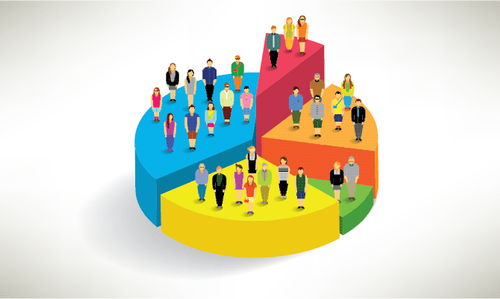





In [ ]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
## Importing the dataset

df = pd.read_csv('Mall_Customers.csv')


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
## Let's check for the Null Values

df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
## Let's drop the unnecessary column in the  dataset

df.drop(['CustomerID'],axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

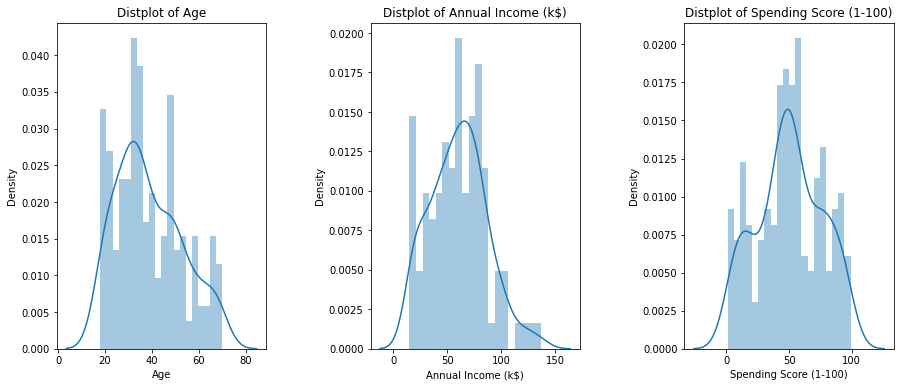

In [ ]:
plt.figure(1 ,figsize = (15,6))

n= 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.distplot(df[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

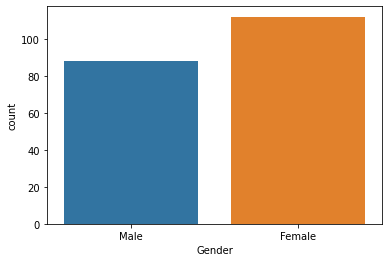

In [ ]:
## Let's plot for the Gender -- Count plot would be the best plot for the purpose

sns.countplot(x="Gender", data=df)

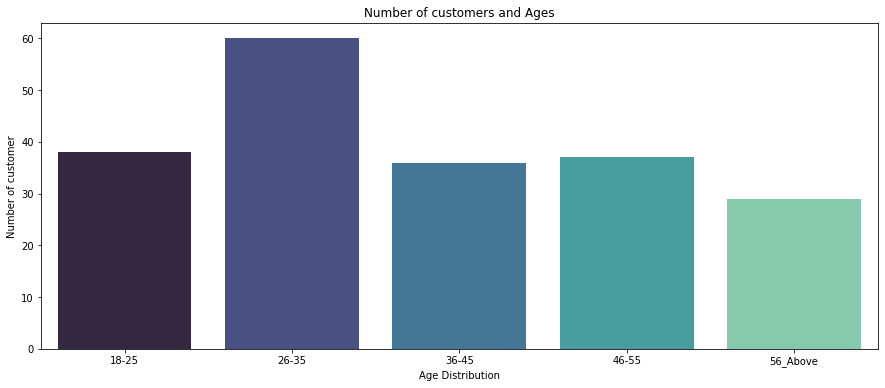

In [ ]:
## Let's visualize the age in a proper way so let's classiy the age

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 =  df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_56 = df.Age[(df.Age >= 56)]

age_x = ["18-25","26-35","36-45","46-55","56_Above"]
axis_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56.values)]


plt.figure(figsize = (15,6))
sns.barplot(x = age_x,y = axis_y, palette= "mako")
plt.title("Number of customers and Ages")
plt.xlabel("Age Distribution")
plt.ylabel("Number of customer")
plt.show()

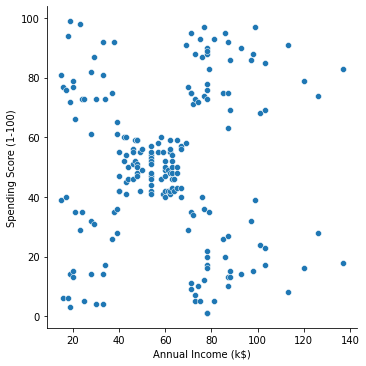

In [ ]:
sns.relplot(x = "Annual Income (k$)", y = "Spending Score (1-100)",data = df)

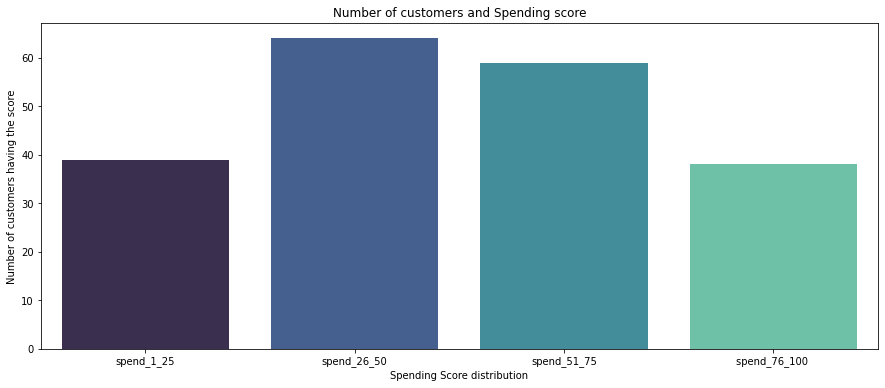

In [ ]:
## Let's categorize on the basis spending score

spend_1_25 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 25)]
spend_26_50 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 26) & (df['Spending Score (1-100)'] <= 50)]
spend_51_75 =  df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 51) & (df['Spending Score (1-100)'] <= 75)]
spend_76_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 76) & (df['Spending Score (1-100)'] <= 100)]


age_x = ["spend_1_25", "spend_26_50","spend_51_75","spend_76_100 "]
axis_y = [len(spend_1_25.values),len(spend_26_50.values),len(spend_51_75.values),len(spend_76_100.values)]


plt.figure(figsize = (15,6))
sns.barplot(x = age_x,y = axis_y, palette= "mako")
plt.title("Number of customers and Spending score")
plt.xlabel("Spending Score distribution")
plt.ylabel("Number of customers having the score")
plt.show()

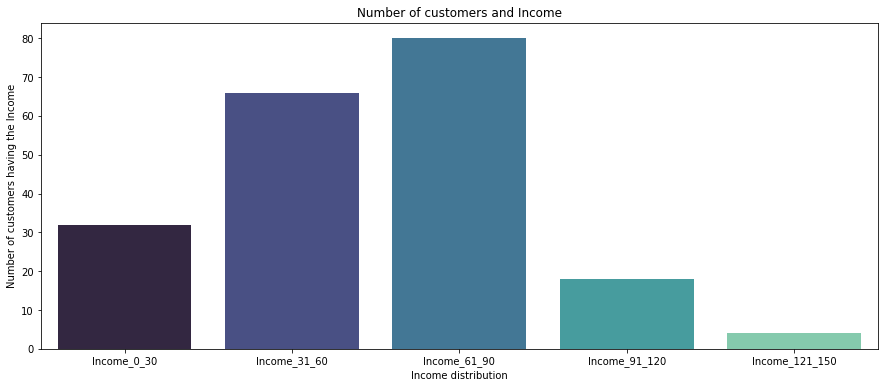

In [ ]:
## Let's categorize the income dataset

## Let's categorize on the basis spending score

Income_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
Income_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
Income_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
Income_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
Income_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

age_x = ["Income_0_30", "Income_31_60","Income_61_90","Income_91_120","Income_121_150"]
axis_y = [len(Income_0_30.values),len(Income_31_60.values),len(Income_61_90.values),len(Income_91_120.values),len(Income_121_150.values)]


plt.figure(figsize = (15,6))
sns.barplot(x = age_x,y = axis_y, palette= "mako")
plt.title("Number of customers and Income")
plt.xlabel("Income distribution")
plt.ylabel("Number of customers having the Income")
plt.show()


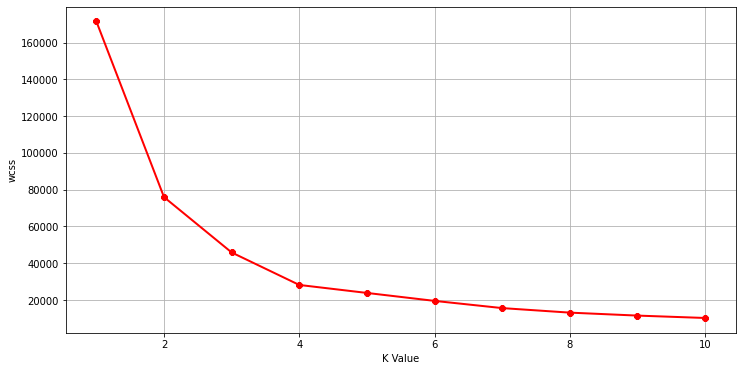

In [ ]:
x1 = df.loc[:,['Age',"Spending Score (1-100)"]].values


from sklearn.cluster import KMeans

## Let's find the optimum number of cluster using within square sum of square method

WCSS =[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init = "k-means++")
  kmeans.fit(x1)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),WCSS,linewidth = 2,color = "red",marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()




In [ ]:
kmeans = KMeans(n_clusters = 4)

model = kmeans.fit_predict(x1)

print(model)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


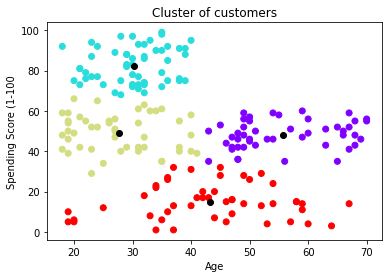

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "black")

plt.title("Cluster of customers")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100')
plt.show()